In [1]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets 
import numpy as np 
import vice 
import sys 
sys.path.append("../") 
import src 
from src.plots.plots.utils import dummy_background_axes 
from src.simulations.yields import linear_agb_yield 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)
../src/plots/env.py:42: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]


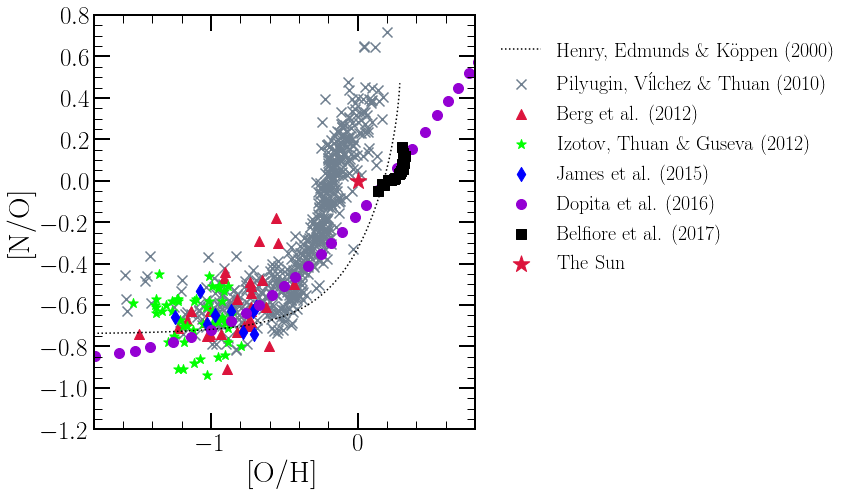

In [2]:
### figure setup ### 
fig = plt.figure(figsize = (12, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.8, 0.8]) 
ax.set_ylim([-1.2, 0.8])
ax.set_yticks([-1.2 + 0.2 * _ for _ in range(11)])   

### Pilyugin, Vilchez & Thuan (2010) ### 
pilyugin2010 = src.data.read("pilyugin2010") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["slategray"], 
    "marker": plots.mpltoolkit.markers()["x"], 
    "label": r"Pilyugin, V$\acute{\text{i}}$lchez \& Thuan (2010)", 
    "s": 100 
}
ax.scatter(pilyugin2010["[o/h]"], pilyugin2010["[n/o]"], **kwargs) 

### Berg et al. (2012) ### 
berg2012 = src.data.read("berg2012") 
kwargs["c"] = plots.mpltoolkit.named_colors()["crimson"] 
kwargs["marker"] = plots.mpltoolkit.markers()["triangle_up"] 
kwargs["label"] = "Berg et al. (2012)" 
ax.scatter(berg2012["[o/h]"], berg2012["[n/o]"], **kwargs) 

### Izotov, Thuan & Guseva (2012) ### 
izotov2012 = src.data.read("izotov2012") 
kwargs["c"] = plots.mpltoolkit.named_colors()["lime"] 
kwargs["marker"] = plots.mpltoolkit.markers()["star"] 
kwargs["label"] = "Izotov, Thuan \& Guseva (2012)" 
ax.scatter(izotov2012["[o/h]"], izotov2012["[n/o]"], **kwargs) 

### James et al. (2015) ### 
james2015 = src.data.read("james2015") 
kwargs["c"] = plots.mpltoolkit.named_colors()["blue"] 
kwargs["marker"] = plots.mpltoolkit.markers()["thin_diamond"] 
kwargs["label"] = "James et al. (2015)" 
ax.scatter(james2015["[o/h]"], james2015["[n/o]"], **kwargs) 

### Dopita et al. (2016) ### 
dopita2016 = src.data.read("dopita2016") 
kwargs["c"] = plots.mpltoolkit.named_colors()["darkviolet"] 
kwargs["marker"] = plots.mpltoolkit.markers()["circle"] 
kwargs["label"] = "Dopita et al. (2016)" 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 

### Belfiore et al. (2017) ### 
belfiore2017 = src.data.read("belfiore2017") 
kwargs["c"] = plots.mpltoolkit.named_colors()["black"] 
kwargs["marker"] = plots.mpltoolkit.markers()["square"] 
kwargs["label"] = "Belfiore et al. (2017)" 
ax.scatter(belfiore2017["[o/h]"], belfiore2017["[n/o]"], **kwargs) 

### Henry, Edmunds & Koeppen (2000) 
henry2000 = src.no_oh_relation.Henry2000() 
xvals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000) 
yvals = [henry2000(_) for _ in xvals] 
ax.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':', label = r"Henry, Edmunds \& K$\ddot{\text{o}}$ppen (2000)") 

### the sun ### 
ax.scatter([0], [0], c = plots.mpltoolkit.named_colors()["crimson"], 
    marker = plots.mpltoolkit.markers()["star"], s = 300, zorder = 100, 
    label = "The Sun")

### Legend ### 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 20, 
    "bbox_to_anchor": (1.02, 0.98) 
} 
ax.legend(**kwargs) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_observed.pdf") 

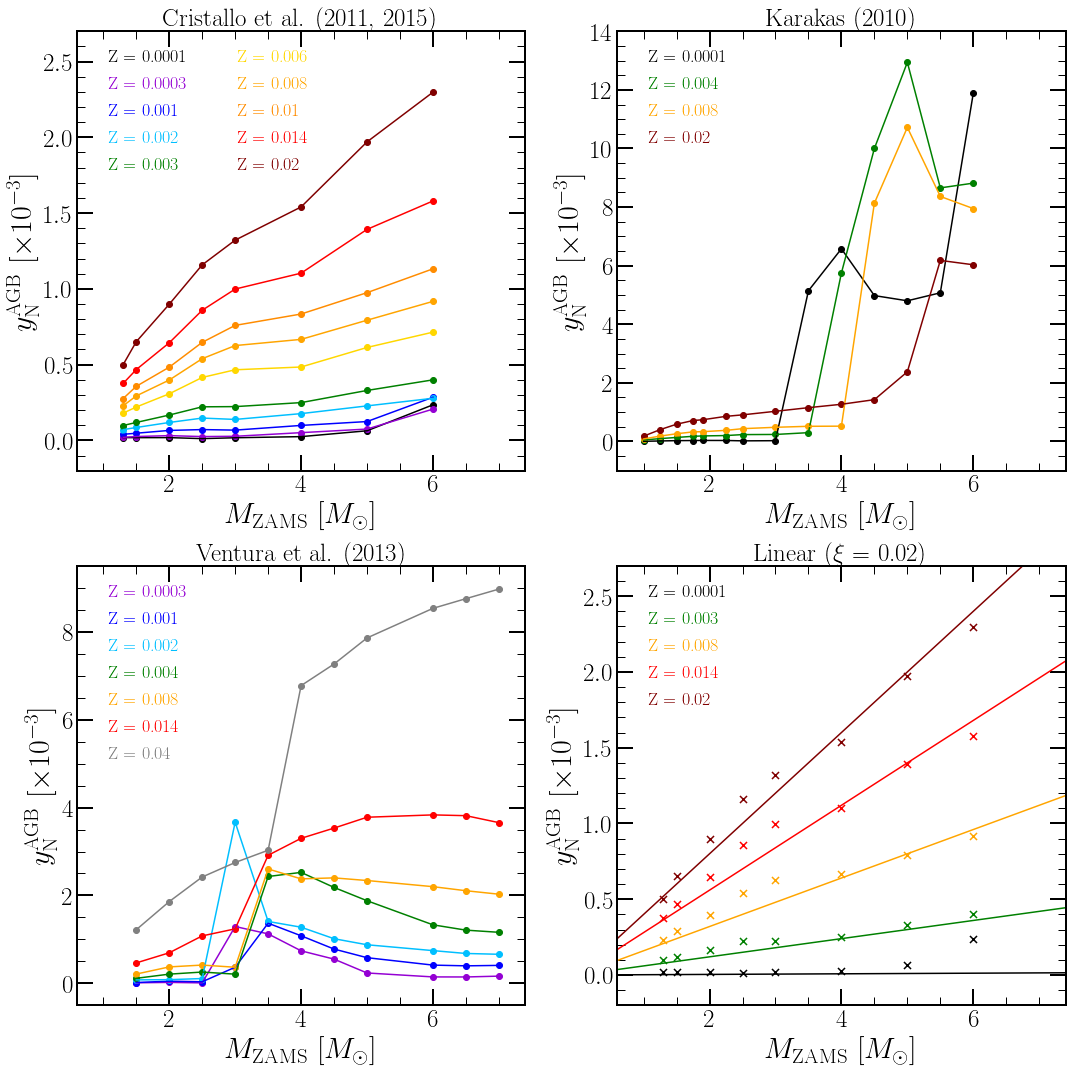

In [3]:
logprefactor = 3 # overall factor of 10^(-logprefactor) 

### figure setup ### 
fig = plt.figure(figsize = (15, 15), facecolor = "white") 
axes = [] 
ylim = [[-0.2, 2.7], [-1, 14], [-0.5, 9.5], [-0.2, 2.7]] 
labels = ["Cristallo et al. (2011, 2015)", "Karakas (2010)", "Ventura et al. (2013)", 
    r"Linear ($\xi$ = 0.02)"] 
for i in range(4): 
    axes.append(fig.add_subplot(221 + i)) 
#     if i == 3: 
    axes[i].set_xlabel(r"$M_\text{ZAMS}$ [$M_\odot$]") 
    axes[i].set_ylabel(r"$y_\text{N}^\text{AGB}$ [$\times10^{-3}$]") 
#     else: 
#         plt.setp(axes[i].get_xticklabels(), visible = False) 
    axes[i].set_xlim([0.6, 7.4]) 
    axes[i].set_ylim(ylim[i]) 
#     axes[i].yaxis.set_label_position("right") 
#     axes[i].set_title(labels[i], rotation = 270, labelpad = 30) 
    axes[i].set_title(labels[i], fontsize = 25)
# dummy = dummy_background_axes([axes]) 
# dummy.set_ylabel(r"$y_\text{N}^\text{AGB}$ [$\times10^{-3}$]", labelpad = 40) 

### colors to plot each study's table in - each of the same length as the metallicities ### 
colors = {
    "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
                    "green", "gold", "orange", "darkorange", "red", "maroon"], 
    "karakas10": ["black", "green", "orange", "maroon"], 
    "ventura13": ["darkviolet", "blue", "deepskyblue", "green", "orange", "red", "grey"] 
} 
studies = ["cristallo11", "karakas10", "ventura13"] 
legend_kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "frameon": False, 
    "handlelength": 0, 
    "fontsize": 18 
}
for i in range(3): ### for each published table 
    y, m, z = vice.yields.agb.grid('n', study = studies[i]) 
    for j in range(len(z)): ### for each metallicity they report yields at 
        # plot points connected by lines 
        yields = [10**logprefactor * _[j] for _ in y] 
        kwargs = {"c": plots.mpltoolkit.named_colors()[colors[studies[i]][j]]} 
        axes[i].scatter(m, yields, **kwargs) 
        kwargs["label"] = "Z = %g" % (z[j]) 
        axes[i].plot(m, yields, **kwargs) 
    leg = axes[i].legend(ncol = 1 if i else 2, **legend_kwargs) 
    for j in range(len(z)): 
        leg.get_texts()[j].set_color(colors[studies[i]][j]) 
        leg.legendHandles[j].set_visible(False) 
        
### The linear model, with a few reference points from Cristallo et al. (2011, 2015) 
Z = [0.0001, 0.003, 0.008, 0.014, 0.02] 
colors = ["black", "green", "orange", "red", "maroon"] 
model = linear_agb_yield(slope = 0.02) 
y, m, z = vice.yields.agb.grid('n', study = "cristallo11") 
for i in range(len(Z)): 
    masses = np.linspace(axes[-1].get_xlim()[0], axes[-1].get_xlim()[1], 1000) 
    yields = [10**logprefactor * model(mass, Z[i]) for mass in masses] 
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
    idx = z.index(Z[i]) 
    yields_ = [10**logprefactor * _[idx] for _ in y] 
    axes[-1].scatter(m, yields_, marker = plots.mpltoolkit.markers()["x"], s = 50, **kwargs) 
    kwargs["label"] = "Z = %g" % (Z[i]) 
    axes[-1].plot(masses, yields, **kwargs) 
leg = axes[-1].legend(ncol = 1, **legend_kwargs) 
for i in range(len(Z)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 


plt.tight_layout() 
# plt.subplots_adjust(hspace = 0) 
plt.savefig("../paper/agb_yield_models.pdf") 

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: ScienceWarning: Supernovae yields from the Woosley & Weaver (1995) ApJ, 101, 181 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this m

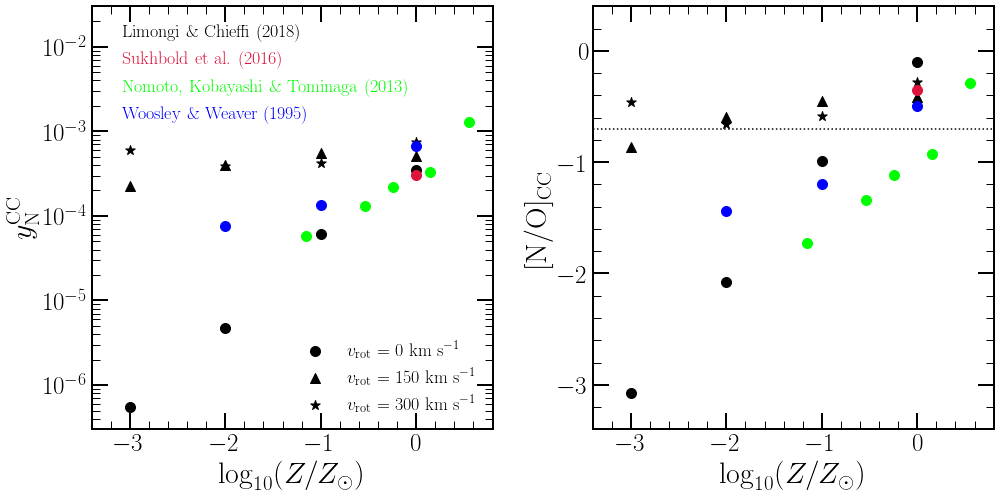

In [12]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
ax1.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
ax2.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
ax1.set_ylabel(r"$y_\text{N}^\text{CC}$") 
# ax2.set_ylabel(r"$\log_{10}\text{(N/O)}_\text{CC}$") 
ax2.set_ylabel(r"[N/O]$_\text{CC}$") 
ax1.set_yscale("log") 
ax1.set_xlim([-3.4, 0.8]) 
ax2.set_xlim([-3.4, 0.8]) 
ax1.set_ylim([3.e-7, 3.e-2]) 
ax2.set_ylim([-3.4, 0.4]) 
ax2.set_yticks([-3, -2, -1, 0]) 
studies = ["LC18", "S16/W18", "NKT13", "WW95"] 
names = {
    "LC18": "Limongi \& Chieffi (2018)", 
    "NKT13": "Nomoto, Kobayashi \& Tominaga (2013)", 
    "S16/W18": "Sukhbold et al. (2016)", 
    "WW95": "Woosley \& Weaver (1995)" 
}
metallicities = {
    "LC18": [-3, -2, -1, 0], 
    "NKT13": [-1.15, -0.54, -0.24, 0.15, 0.55], 
    "S16/W18": [0], 
    "WW95": [-4, -2, -1, 0] 
} 
rotation = {
    "LC18": [0, 150, 300], 
    "NKT13": [0], 
    "S16/W18": [0], 
    "WW95": [0] 
}
markers = {
    0: "circle", 
    150: "triangle_up", 
    300: "star" 
}
colors = {
    "LC18": "black", 
    "NKT13": "lime", 
    "S16/W18": "crimson", 
    "WW95": "blue" 
}

for i in studies: 
    for j in metallicities[i]: 
        for k in rotation[i]: 
            kwargs = {
                "c": plots.mpltoolkit.named_colors()[colors[i]], 
                "marker": plots.mpltoolkit.markers()[markers[k]], 
                "s": 100 
            }
            y_n_cc, _ = vice.yields.ccsne.fractional('n', study = i, MoverH = j, rotation = k) 
            y_o_cc, _ = vice.yields.ccsne.fractional('o', study = i, MoverH = j, rotation = k) 
#             cc_ratio = np.log10(y_n_cc / y_o_cc) - np.log10(14.007 / 15.999) 
            cc_ratio = np.log10(y_n_cc / y_o_cc) - np.log10(vice.solar_z['n'] / vice.solar_z['o']) 
            ax1.scatter(j, y_n_cc, **kwargs)
            ax2.scatter(j, cc_ratio, **kwargs) 
ax2.plot(ax2.get_xlim(), 2 * [-0.7], c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':') 
            
lines = len(studies) * [None] 
for i in range(len(lines)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[studies[i]]], 
        "label": names[studies[i]] 
    }
    lines[i] = ax1.plot([0, 0], [1, 1], **kwargs)[0] 
leg = ax1.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), fontsize = 18, ncol = 1, 
    frameon = False, handlelength = 0) 
ax1.add_artist(leg) 
for i in range(len(lines)): 
    leg.get_texts()[i].set_color(colors[studies[i]]) 
    leg.legendHandles[i].set_visible(False) 
    lines[i].remove() 
points = len(rotation["LC18"]) * [None] 
for i in range(len(points)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()["black"], 
        "marker": plots.mpltoolkit.markers()[markers[rotation["LC18"][i]]], 
        "label": r"$v_\text{rot}$ = %g km s$^{-1}$" % (rotation["LC18"][i]), 
        "s": 100 
    } 
    points[i] = ax1.scatter([0, 0], [1, 1], **kwargs) 
ax1.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), fontsize = 18, ncol = 1, 
    frameon = False) 
for i in range(len(points)): 
    points[i].remove() 

plt.tight_layout() 
plt.subplots_adjust(wspace = 0.25)
plt.savefig("../paper/n_cc_yields.pdf") 